In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Настройка, для того чтобы график был более читабельный
sns.set(rc = {'figure.figsize': (9, 6)})

# Обзор данных:

In [4]:
df_events = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

In [5]:
df_events.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [6]:
df_status = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [7]:
df_status.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [8]:
df_events.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

# Преобразуем наши данные:

In [9]:
# добавим колонку с преобразованным временем
df_events['date'] = pd.to_datetime(df_events.timestamp, unit='s')

In [10]:
df_events.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [11]:
df_events.date.min()

Timestamp('2015-06-15 04:00:48')

In [12]:
df_events.date.max()

Timestamp('2018-05-19 23:33:31')

In [13]:
# Добавим колонку с днём
df_events['day'] = df_events.date.dt.date

In [14]:
df_events.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [15]:
# Количество пользователей каждый день
df_events.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

<Axes: xlabel='day'>

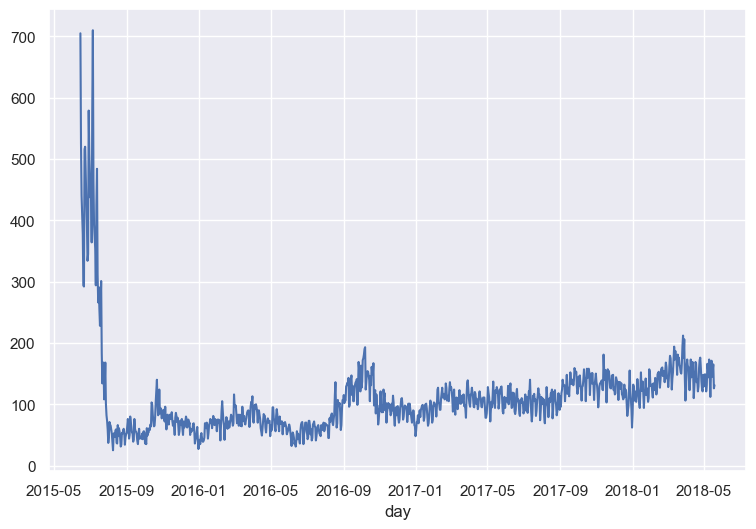

In [16]:
df_events.groupby('day').user_id.nunique().plot()

In [17]:
df_events.pivot_table(index = 'user_id', columns = 'action',\
                      values = 'step_id', aggfunc = 'count', fill_value = 0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [18]:
df_events.pivot_table(index = 'user_id', columns = 'action',\
                      values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<Axes: >

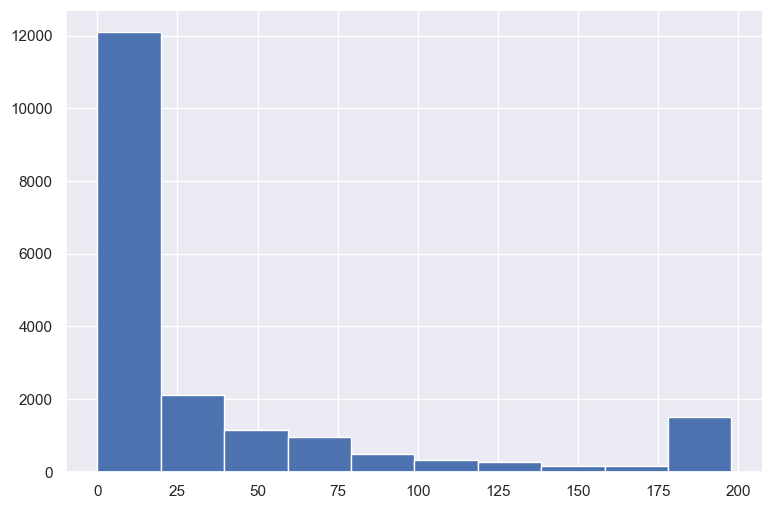

In [19]:
df_events.pivot_table(index = 'user_id', columns = 'action',\
                      values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index().discovered.hist()

In [20]:
df_status['date'] = pd.to_datetime(df_status['timestamp'], unit = 's')

In [21]:
df_status['day'] = df_status['date'].dt.date

In [22]:
df_status.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


Как разделить людей, которые бросили курс и которые в процессе его прохождения?

Стратегия 1: Рассчитать для каждого пользователя, какие были промежутки между его прохождения степов, посмотреть на этк картину в целом по всем нашим пользователям, и принять мтатистическое решение.

In [23]:
# оставляем для кождого пользователя одну строчку, когда он был на степике
df_events[['user_id', 'day','timestamp']].drop_duplicates(\
                                                       subset = ['user_id','day']  ).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [24]:
# соберём для пользователя все его таймстемпы и посмотрим перерывы между ними 
df_events[['user_id', 'day','timestamp']]\
.drop_duplicates(subset = ['user_id','day']).groupby('user_id')['timestamp'].apply(list).head()
# отобрали и сохранили в список (apply(list))

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [25]:
# теперь найдём перерывы
df_events[['user_id', 'day','timestamp']]\
.drop_duplicates(subset = ['user_id','day']).groupby('user_id')['timestamp']\
.apply(list).apply(np.diff).head()
# apply(np.diff) возвращает список, в котором разницы между двумя соседними элементами
# например np.diff([1,2,5])
# вывод array([1,3])

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [26]:
# сохраним получившееся в переменную
gap_data = df_events[['user_id', 'day','timestamp']]\
.drop_duplicates(subset = ['user_id','day']).groupby('user_id')['timestamp']\
.apply(list).apply(np.diff).values
# у нас получился массив массивов. Сделаем из него просто массив:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [27]:
gap_data = gap_data / (24*60*60)
# у нас получилась серия, где для каждого пользователя записаны значения разницы между двумя заходами на курс

<Axes: >

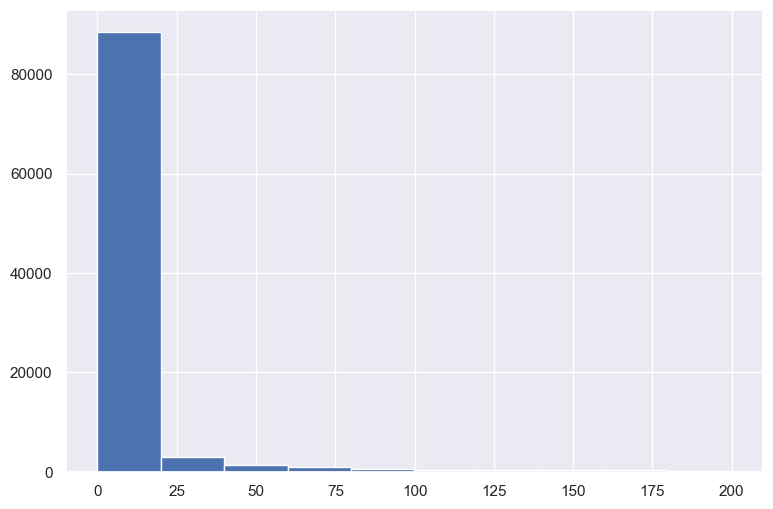

In [28]:
gap_data[gap_data<200].hist()

In [29]:
 gap_data.quantile(0.95)

59.760440972222156

In [30]:
# только 5% пользователей возвращаются на курс после перерыва 2 месяца

In [31]:
  gap_data.quantile(0.90)

18.325995370370403

In [32]:
# будем считать так:
# если человек не имеет сертификата курса
# и
# не заходил на курс более 30 дней (timestamp = 30*24*60*60 = 2592000
# тогда будем считать его бросившим курс


In [33]:
df_events.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [34]:
# 1526772811 - последний день курса
# он нам нужен, чтобы вычесть тех людей которые в процессе прохождения курса

In [35]:
user_data = df_events.groupby('user_id', as_index=False)\
.agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [36]:
now = 1526772811
drop_out_treshold = 2592000
user_data['is_gone_user'] = (now - user_data.last_timestamp) > drop_out_treshold

In [37]:
user_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [38]:
# теперь видим, кто не заходил на курс больше 30 дней
# добавим условие, что человек не имеет сертификат
users_scores = df_status.pivot_table(index = 'user_id',columns = 'submission_status',\
                                    values='step_id',aggfunc='count',
                                    fill_value = 0).reset_index()

In [39]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [40]:
user_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [41]:
# user_data.merge(users_scores, how='inner').head() - uncorrect
user_data = user_data.merge(users_scores, how='outer')

In [42]:
user_data = user_data.fillna(0)

In [43]:
user_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [44]:
users_events_data = df_events.pivot_table(index = 'user_id',
                                         columns = 'action',
                                         values = 'step_id',
                                         aggfunc = 'count',
                                         fill_value =0).reset_index()

In [45]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [46]:
user_data = user_data.merge(users_events_data, how = 'outer')

In [47]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [48]:
users_days = df_events.groupby('user_id').day.nunique().to_frame().reset_index()

In [49]:
user_data = user_data.merge(users_days, how = 'outer')

In [50]:
user_data.user_id.nunique() # проверяем, что никого не потеряли

19234

In [51]:
user_data['passed_course'] = user_data.passed > 170

In [52]:
user_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [53]:
user_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [68]:
user_min_time = df_events.groupby('user_id' , as_index=False).agg({'timestamp':'min'}).rename({'timestamp':'min_timestamp'} , axis=1)


user_data = user_data.merge(user_min_time , how='outer')


In [78]:
df_events['user_time'] = df_events.user_id.map(str) + '_' + df_events.timestamp.map(str)

In [79]:
df_events

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,11677_1526772685
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750


In [81]:
learning_time_treshold = 3 * 24 * 60 * 60
learning_time_treshold

259200

In [82]:
user_learning_time_treshold = user_min_time.user_id.map(str)+ '_' + \
(user_min_time.min_timestamp + learning_time_treshold).map(str)

In [84]:
user_min_time['user_learning_time_treshold'] = user_learning_time_treshold

In [86]:
df_events = df_events.merge(user_min_time[['user_id', 'user_learning_time_treshold']], how = 'outer')

In [87]:
df_events.shape

(3480703, 8)

In [88]:
df_events_train = df_events[df_events.user_time < df_events.user_learning_time_treshold]

In [91]:
df_events_train.groupby('user_id').day.nunique().max()

4

In [95]:
#Добавляем в submissions_data время первого степа
df_status = df_status.merge(user_min_time, on='user_id', how='left')
# Время от первого степа до последнего
df_status['users_time'] = df_status['timestamp'] - df_status['min_timestamp']
#Выбираем степы первых трёх дней
df_status_train = df_status[df_status.users_time <= 3*24*60*60]
df_status_train.groupby('user_id').day.nunique().max()

4

In [99]:
X = df_status_train.groupby('user_id').day.nunique().to_frame().reset_index()\
.rename(columns = {'day': 'days'})

In [100]:
steps_tried = df_status_train.groupby('user_id').day.nunique().to_frame().reset_index()\
.rename(columns = {'step_id': 'step_tried'})

In [101]:
X = X.merge(steps_tried, on = 'user_id', how='outer')

In [102]:
X.head()

,user_id,days,day
0,2,1,1
1,3,1,1
2,8,1,1
3,14,1,1
4,16,3,3


In [104]:
X = X.merge(df_status_train.pivot_table(index = 'user_id',
                                    columns = 'submission_status',
                                    values = 'step_id',
                                    aggfunc='count',
                                    fill_value=0).reset_index())

In [106]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [107]:
X

,user_id,days,day,correct,wrong,correct_ratio
0,2,1,1,2,0,1.000000
1,3,1,1,4,4,0.500000
2,8,1,1,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,3,23,27,0.460000
...,...,...,...,...,...,...
8908,26787,1,1,3,0,1.000000
8909,26790,1,1,1,0,1.000000
8910,26794,3,3,31,9,0.775000
8911,26797,1,1,2,0,1.000000


In [110]:
X = X.merge(df_status_train.pivot_table(index = 'user_id',
                                    columns = 'action',
                                    values = 'step_id',
                                    aggfunc='count',
                                    fill_value=0).reset_index()[['user_id','views']], how = 'outer')
        

KeyError: 'actions'

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp,user_learning_time_treshold,users_time
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1434345977,15853_1434605177,3298
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1434345977,15853_1434605177,2323
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,1434345977,15853_1434605177,44506172
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,1434345977,15853_1434605177,44506187
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434345977,15853_1434605177,2146
...,...,...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05,1501946660,2615_1502205860,299
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18,1503055287,13177_1503314487,4640
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25,1506347263,15253_1506606463,890
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06,1523035269,1424_1523294469,47


In [113]:
# потерялась, потом разберусь)

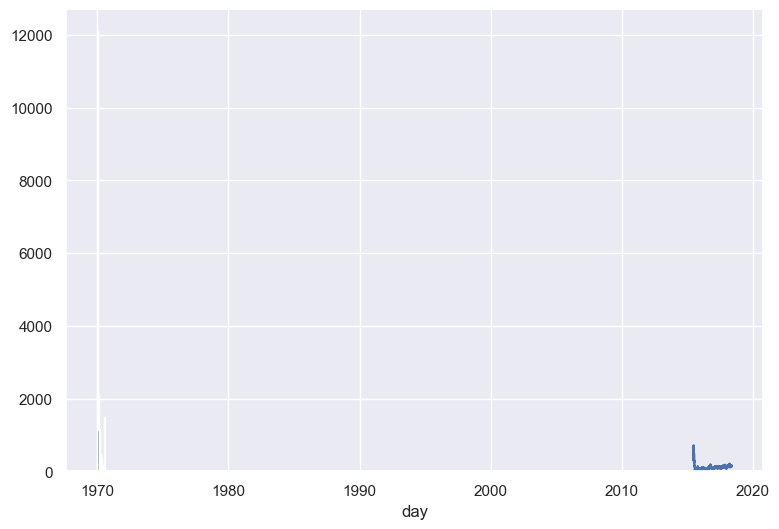

In [122]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from os import system
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import SVG
from graphviz import Source 
from IPython.display import display 
from IPython.display import HTML
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

sns.set(rc={'figure.figsize': (9,6)})


events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')



events_data.head()


events_data['date'] = pd.to_datetime(events_data.timestamp , unit = 's')


events_data.head()


events_data['day'] = events_data.date.dt.date


events_data.groupby('day')    .user_id.nunique().plot()

events_data.pivot_table(index='user_id' , 
                        columns='action' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index().discovered.hist()


users_events_data = events_data.pivot_table(index='user_id' , 
                        columns='action' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index()


users_events_data.head()


#ТЕПЕРЬ ПЕРЕХОДИМ К 2-МУ ДАТАФРЕЙМУ SUBMISSIONS DATA И НАЧИНАЕМ ОБРАБОТКУ ДАННЫХ

submissions_data['date'] = pd.to_datetime(submissions_data.timestamp , unit = 's')
submissions_data['day'] = submissions_data.date.dt.date


users_scores=submissions_data.pivot_table(index='user_id' , 
                        columns='submission_status' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index()


users_scores.head()


gaps_data=events_data[['user_id' , 'day' , 'timestamp']].drop_duplicates(subset=[ 'day' ])    .groupby('user_id')['timestamp'].apply(list)     .apply(np.diff).values




gaps_data=pd.Series(np.concatenate(gaps_data , axis=0))




gaps_data = gaps_data / (24*60*60)   #делим на (20*60*60) что би из таймстемпов подучить значения в днях


gaps_data.quantile(0.90) 


30 * 24 * 60 * 60


users_data = events_data.groupby('user_id' , as_index=False)    .aggregate({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})


now = 1526772811
drop_out_treshold = 2592000


users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshold


users_data = users_data.merge(users_scores , how='outer')


users_data = users_data.fillna(0)


users_data = users_data.merge(users_events_data , how='outer')


users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()


users_data  =  users_data.merge(users_days , how='outer')

users_data['passed_course'] = users_data.passed > 170


users_data.groupby('passed_course').count()


100 *  1425 / 17809   # процент закончивших курс 


users_data.head()     # почти финальная часть обработки данных 


users_data[users_data.passed_course].day.hist()


user_min_time = events_data.groupby('user_id' , as_index=False).agg({'timestamp':'min'}).rename({'timestamp':'min_timestamp'} , axis=1)


users_data = users_data.merge(user_min_time , how='outer')

events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)


learning_time_treshhold =  3 * 24 *60 * 60  #промежуток  3 дня


user_learning_time_treshhold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_treshhold).map(str)


user_min_time['user_learning_time_treshhold'] = user_learning_time_treshhold




events_data = events_data = events_data.merge(user_min_time[['user_id','user_learning_time_treshhold']] , how='outer')


events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_treshhold]

submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_treshhold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_treshhold]
submissions_data_train.groupby('user_id').day.nunique().max()


X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns={'day':'days'})


steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns={'step_id':'steps_tried'})


X = X.merge(steps_tried, on='user_id' , how='outer')


X = X.merge(submissions_data_train.pivot_table(index='user_id' , 
                        columns='submission_status' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index())


X['correct_ratio'] = X.correct / (X.correct + X.wrong)


X = X.merge(events_data_train.pivot_table(index='user_id' , 
                        columns='action' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index()[['user_id','viewed']],how='outer')


X = X.fillna(0)


X = X.merge(users_data[['user_id', 'passed_course','is_gone_user']] , how='outer')


X = X[~((X.is_gone_user == False) & (X.passed_course == False))]


y = X.passed_course.map(int)
X = X.drop(['passed_course' , 'is_gone_user'] , axis=1)
X = X.set_index(X.user_id)
X = X.drop('user_id' , axis=1)
                                                                      #финальные данные для работы
